# Surf map

In [4]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current directory
print("Current directory:", current_directory)


Current directory: /home/sunzid/Research/23-24_Automatic-Control-Lab/LLMSim


In [2]:
import os

new_directory = '/home/sunzid/LLMSim'

# Change the current working directory
os.chdir(new_directory)

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator


### Read data

In [4]:
# Read data

# folder_path = 'Collection1/'
folder_path = 'Collection22/'
olfaction_1_csv = '*_1_olfaction.csv'
olfaction_csv = '*_olfaction.csv'

olfaction_files = glob.glob(folder_path + olfaction_csv)
olfaction_1_files = glob.glob(folder_path + olfaction_1_csv)

grid = pd.read_csv('grid.csv')

sensor_template = pd.read_csv('Ordered_Olfaction.csv')

print(len(olfaction_1_files))

25


In [ ]:
# Process data

x_list = []
y_list = []
x_list1 = []
y_list1 = []
direction_list = []
plume_list = []
glb_wind_blow_dir_list = []
wind_spd_list = []

for file in olfaction_files:
    df = pd.read_csv(file)
    x_list.append(float(file.split('/')[-1].split('_')[0]))
    y_list.append(float(file.split('/')[-1].split('_')[1]))
    direction_list.append(int(file.split('/')[-1].split('_')[2]))
    plume_list.append(round(df.plume.mean()))

olfaction_1 = pd.DataFrame({'x': x_list, 'y': y_list, 'direction': direction_list,
              'plume': plume_list})

for file in olfaction_1_files:
    df1 = pd.read_csv(file)
    x_list1.append(float(file.split('/')[-1].split('_')[0]))
    y_list1.append(float(file.split('/')[-1].split('_')[1]))
    glb_wind_blow_dir_list.append(round(df1.glbWindBlowDir.mean(), 2))
    wind_spd_list.append(round(df1.windSpd.mean(), 2))

olfaction_2 = pd.DataFrame({'x': x_list1, 'y': y_list1,
              'glb_wnd_blw_dir': glb_wind_blow_dir_list, 'wind_spd': wind_spd_list})

olfaction = olfaction_1.merge(olfaction_2, on=['x', 'y'], how='inner')

ordered_olfaction  = grid.merge(olfaction, on=['x', 'y'], how='inner')

ordered_olfaction_1dir = ordered_olfaction[ordered_olfaction['direction']==1]

ordered_olfaction_1dir[['plume', 'glb_wnd_blw_dir', 'wind_spd']] = ordered_olfaction_1dir[['plume', 'glb_wnd_blw_dir', 'wind_spd']].replace(0, np.nan)

/tmp/ipykernel_21261/3759403110.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordered_olfaction_1dir[['plume', 'glb_wnd_blw_dir', 'wind_spd']] = ordered_olfaction_1dir[['plume', 'glb_wnd_blw_dir', 'wind_spd']].replace(0, np.nan)


In [ ]:
print(len(ordered_olfaction_1dir))
ordered_olfaction_1dir

25


,x,y,direction,plume,glb_wnd_blw_dir,wind_spd
0,0.2,-0.2,1,772.0,192.52,0.30
6,0.1,0.4,1,778.0,151.07,1.71
11,0.0,1.0,1,784.0,178.13,1.02
13,-0.1,1.6,1,792.0,186.99,1.34
16,-0.2,2.2,1,797.0,147.86,0.22
23,0.8,-0.1,1,760.0,200.19,0.43
25,0.7,0.5,1,723.0,160.40,2.06
29,0.6,1.1,1,702.0,178.51,0.96
35,0.5,1.7,1,710.0,196.69,1.29
39,0.4,2.3,1,804.0,229.58,0.16


## 3D Table??

In [ ]:
import numpy as np
import pandas as pd

# Example input data for meshgrid
x = np.arange(1, 6)  # X-axis points
y = np.arange(1, 6)  # Y-axis points
X, Y = np.meshgrid(x, y)

# Example input data arrays
plume = np.array(ordered_olfaction_1dir.plume).reshape((len(Y), len(X)))
wind_dir = np.array(ordered_olfaction_1dir.glb_wnd_blw_dir).reshape((len(Y), len(X)))
wind_spd = np.array(ordered_olfaction_1dir.wind_spd).reshape((len(Y), len(X)))

# Stack the data arrays into a single 3D array
combined_values = np.stack((plume, wind_dir, wind_spd), axis=-1)

# Function to convert array rows into tuples
def to_tuple(array):
    return [tuple(x) for x in array]

# Convert each row into tuples
tuples_data = [to_tuple(row) for row in combined_values]

# Create a DataFrame from the tuples data
df = pd.DataFrame(tuples_data, index=y, columns=x)

# Flip the columns (x-axis) and the rows (y-axis)
df = df.iloc[::-1].iloc[:, ::-1]

df.to_csv('3d_table.csv')


## Surf graph for plume

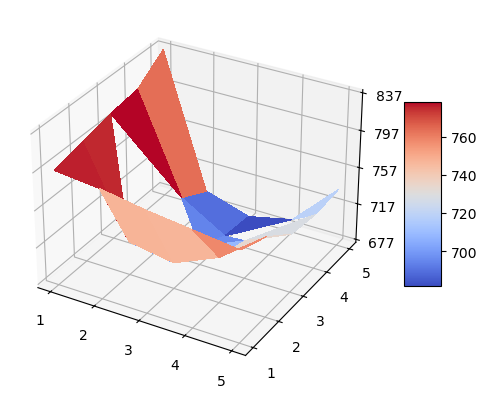

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(1, 6)
Y = np.arange(1, 6)
X, Y = np.meshgrid(X, Y)

plume = np.array(ordered_olfaction_1dir.plume).reshape((len(Y), len(X)))

# Reverse X to invert the x-axis
X = np.flip(X)

# Plot the surface.
surf = ax.plot_surface(X, Y, plume, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.0f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Surf graph for wind direction

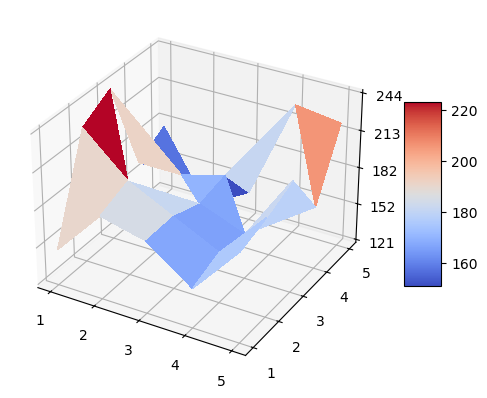

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(1, 6)
Y = np.arange(1, 6)
X, Y = np.meshgrid(X, Y)

wind_dir = np.array(ordered_olfaction_1dir.glb_wnd_blw_dir).reshape((len(Y), len(X)))

# Reverse X to invert the x-axis
X = np.flip(X)

# Plot the surface.
surf = ax.plot_surface(X, Y, wind_dir, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.0f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Surf graph for wind speed

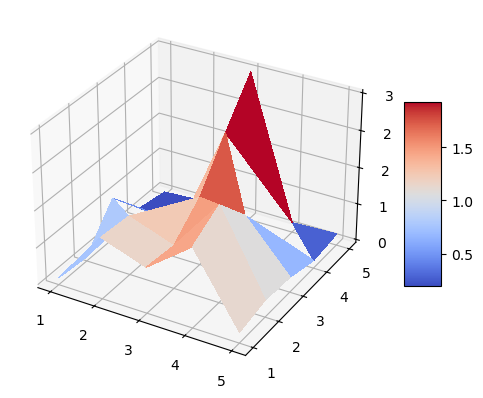

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(1, 6)
Y = np.arange(1, 6)
X, Y = np.meshgrid(X, Y)

wind_spd = np.array(ordered_olfaction_1dir.wind_spd).reshape((len(Y), len(X)))

# Reverse X to invert the x-axis
X = np.flip(X)

# Plot the surface.
surf = ax.plot_surface(X, Y, wind_spd, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.0f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# LLM Nav 0: sensorTable-YOLO, LLM-Decision

In [ ]:
import os

new_directory = '/home/sunzid/LLMSim'

# Change the current working directory
os.chdir(new_directory)

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator


## Sensor data
Sensor data is based on simulation data at present.
In experiment it will be live data in 4 directions of the current location.

### Read simulation data

In [ ]:
# folder_path = 'Collection1/'
olfaction_folder_pathfolder_path = 'Collection22/'
olfaction_1_csv = '*_1_olfaction.csv'
olfaction_csv = '*_olfaction.csv'

olfaction_files = glob.glob(folder_path + olfaction_csv)
olfaction_1_files = glob.glob(folder_path + olfaction_1_csv)

grid = pd.read_csv('grid.csv')

sensor_template = pd.read_csv('Ordered_Olfaction.csv') # sorted coordinate - direction, with obstacle data

print(len(olfaction_1_files))

25


In [ ]:
# Process data

x_list = []
y_list = []
x_list1 = []
y_list1 = []
direction_list = []
plume_list = []
glb_wind_blow_dir_list = []
wind_spd_list = []

for file in olfaction_files:
    df = pd.read_csv(file)
    x_list.append(float(file.split('/')[-1].split('_')[0]))
    y_list.append(float(file.split('/')[-1].split('_')[1]))
    direction_list.append(int(file.split('/')[-1].split('_')[2]))
    plume_list.append(round(df.plume.mean()))

olfaction_1 = pd.DataFrame({'x': x_list, 'y': y_list, 'direction': direction_list,
              'plume': plume_list})

for file in olfaction_1_files:
    df1 = pd.read_csv(file)
    x_list1.append(float(file.split('/')[-1].split('_')[0]))
    y_list1.append(float(file.split('/')[-1].split('_')[1]))
    glb_wind_blow_dir_list.append(round(df1.glbWindBlowDir.mean(), 2))
    wind_spd_list.append(round(df1.windSpd.mean(), 2))

olfaction_2 = pd.DataFrame({'x': x_list1, 'y': y_list1,
              'glb_wnd_blw_dir': glb_wind_blow_dir_list, 'wind_spd': wind_spd_list})

olfaction = olfaction_1.merge(olfaction_2, on=['x', 'y'], how='inner')

ordered_olfaction  = grid.merge(olfaction, on=['x', 'y'], how='inner')

ordered_olfaction_1dir = ordered_olfaction[ordered_olfaction['direction']==1]

ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']] = ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']].replace(0, np.nan)

/tmp/ipykernel_13679/3428060479.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[772. 778. 784. 792. 797. 760. 723. 702. 710. 804. 737. 715. 694.  nan
 811. 733.  nan 680. 709. 815. 736. 688. 677. 692. 837.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']] = ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']].replace(0, np.nan)


In [ ]:
ordered_olfaction = sensor_template.merge(ordered_olfaction.reset_index(drop=True), on=['x', 'y', 'direction'], how='inner')
ordered_olfaction = ordered_olfaction.drop(ordered_olfaction.columns[0], axis=1)
# ordered_olfaction.to_csv("ordered_olfaction.csv")
ordered_olfaction

,x,y,direction,obstacle,plume,glb_wnd_blw_dir,wind_spd
0,0.2,-0.2,1,No,772,192.52,0.30
1,0.2,-0.2,2,No,772,192.52,0.30
2,0.2,-0.2,3,Yes,771,192.52,0.30
3,0.2,-0.2,4,Yes,771,192.52,0.30
4,0.1,0.4,1,No,778,151.07,1.71
...,...,...,...,...,...,...,...
95,2.3,2.0,4,No,692,120.96,0.19
96,2.2,2.6,1,Yes,837,178.70,0.14
97,2.2,2.6,2,Yes,836,178.70,0.14
98,2.2,2.6,3,No,826,178.70,0.14


## Map Transition

In [ ]:
xMap = pd.read_csv('x_Map.csv')
yMap = pd.read_csv('y_Map.csv')
xMap

,Col1,Col2,Col3,Col4,Col5
0,2.2,2.3,2.4,2.5,2.6
1,1.6,1.7,1.8,1.9,2.0
2,1.0,1.1,1.2,1.3,1.4
3,0.4,0.5,0.6,0.7,0.8
4,-0.2,-0.1,0.0,0.1,0.2


In [ ]:
actionID = ""
coordinate_row_ID = 4
coordinate_column_ID = 4

In [ ]:
if actionID == "":
    pass
elif actionID == 1:
    if coordinate_row_ID > 0:
        coordinate_row_ID -= 1
elif actionID == 2:
    if coordinate_column_ID > 0:
        coordinate_column_ID -= 1
elif actionID == 3:
    if coordinate_row_ID < 4:
        coordinate_row_ID += 1
elif actionID == 4:
    if coordinate_column_ID < 4:
        coordinate_column_ID += 1

coordinateX = xMap.iloc[coordinate_row_ID, coordinate_column_ID]
coordinateY = yMap.iloc[coordinate_row_ID, coordinate_column_ID]


## Translation of direction, chemical concentration and wind direction

In [ ]:
sensor_readings = ordered_olfaction[(ordered_olfaction['x'] == coordinateX) & (ordered_olfaction['y'] == coordinateY)]

# Initiating sensor translation file
sensor_translation = sensor_readings[['direction', 'obstacle', 'glb_wnd_blw_dir', 'plume']]

sensor_translation.rename(columns={'direction': 'Direction',
                                'obstacle': 'Facing_Obstacle',
                                'plume' : 'Facing_Odor',
                                'glb_wnd_blw_dir':'Facing_Airflow'}
                                , inplace=True)


# Translate direction
sensor_translation.iloc[0, 2] = "Front"
sensor_translation.iloc[1, 2] = "Left"
sensor_translation.iloc[2, 2] = "Back"
sensor_translation.iloc[3, 2] = "Right"


# Translate plume
medianPlume = sensor_translation.loc[:, 'Facing_Odor'].median()
sensor_translation.loc[:, 'Facing_Odor'] = np.where(sensor_translation['Facing_Odor'] < medianPlume, "Low", "High")

# Translate Wind direcrtion
windDir = sensor_readings['glb_wnd_blw_dir'].max()
print(windDir)

windDirFlag = 2 # back
if 45 < windDir < 134:    # left
    windDirFlag = 1
elif 135 < windDir < 224: # front
    windDirFlag = 0
elif 225 < windDir < 314: # right
    windDirFlag = 3
elif windDir > 315:
    windDirFlag = 2 # back
print(windDirFlag)

sensor_translation.loc[:, 'Facing_Airflow'] = "No"
sensor_translation.iloc[windDirFlag, 2] = "Yes"

sensor_translation.loc[:, 'Facing_Objects'] = ''
sensor_translation.loc[:, 'Facing_Odor_Source'] = ''


## Translation of Vision

In [ ]:
from ultralytics import YOLO

trainedModel = YOLO('/home/sunzid/yolov8/runs/detect/train3/weights/best.pt')

vision_folder_path = 'meta_data/'

visionObjectPrompt = """
You are a plume emitting object detector. You will be provided with a list of objects, and you need to determine if an object in the list can emit plume.
Respond only with the corresponding decision 'Yes' or 'No' without any additional text or punctuation.
If you get an empty list, output 'No' without any additional text or punctuation.
"""

from openai import OpenAI

client = OpenAI(api_key='sk-')


In [ ]:
j = 0
while j < 4:
    vision_csv = f'{coordinateX}_{coordinateY}_{j+1}_vision.png'
    vision_picture_path = glob.glob(vision_folder_path + vision_csv)
    result = trainedModel(vision_picture_path)

    detected_objects = [trainedModel.names[int(box.cls[0])] for box in result[0].boxes]
    object_counts = {obj: detected_objects.count(obj) for obj in set(detected_objects)}
    object_output = ", ".join([f"{count} {obj}" for obj, count in object_counts.items()])

    completion = client.chat.completions.create(
        model="gpt-4",
        messages=[
        {"role": "system", "content": visionObjectPrompt},
        {"role": "user", "content": object_output}])

    visionDetectionOutput = completion.choices[0].message.content.strip()

    # sensor_translation[(sensor_translation['x'] == coordinateX) & (sensor_translation['y'] == coordinateY)] = output
    sensor_translation.iloc[j, 4] = object_output
    sensor_translation.iloc[j, 5] = visionDetectionOutput

    j += 1


0: 480x640 1 Coke can, 1 Humidifier, 1 Humidifier box, 10.1ms
Speed: 17.9ms preprocess, 10.1ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 9.4ms
Speed: 3.1ms preprocess, 9.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Cardboard box, 9.1ms
Speed: 2.5ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Cardboard boxs, 9.1ms
Speed: 2.5ms preprocess, 9.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


,Direction,Facing_Obstacle,Facing_Airflow,Facing_Odor,Facing_Objects,Plume_Source,Facing_Odor_Source
44,1,Yes,Yes,High,"1 Humidifier, 1 Coke can, 1 Humidifier box",No,
45,2,No,No,Low,,No,
46,3,No,No,Low,1 Cardboard box,No,
47,4,No,No,High,2 Cardboard box,No,


## Prompt

In [ ]:
robot_goal = """

Your task is to determine the best direction for a mobile robot to move towards an odor source.
The possible directions and their corresponding numerical values are:
- 'Front' = 1
- 'Left' = 2
- 'Back' = 3
- 'Right' = 4

The decision should be based on the following criteria:

- Facing_Obstacles: Direction with obstacle CANNOT BE SELECTED.
- Facing_Odor_Source: With with odor source SHOULD BE SELECTED.
- Facing_Airflow: Airflow from a direction suggests the odor source is in that direction.
- Facing_Odor: High odor concentration in the direction indicates the presence of the odor source.

Sensor Data:
"""

task = """
Based on this sensor data, classify the best direction for the robot to approach the odor source.
Respond only with the corresponding numerical value: 0, 1, 2, or 3 without any additional text or punctuation.
"""



In [ ]:
sensorMD = sensor_translation.to_markdown(index=False)

robot_prompt = robot_goal + "\n" + sensorMD + "\n" + task

print(robot_prompt)




Your task is to determine the best direction for a mobile robot to move towards an odor source.
The possible directions and their corresponding numerical values are:
- 'Front' = 1
- 'Left' = 2
- 'Back' = 3
- 'Right' = 4

The decision should be based on the following criteria:

- Facing_Odor: High odor concentration in the direction indicates the presence of the odor source.
- Facing_Objects: Objects that can emit vapor or odor suggest the direction of the odor source.
- Facing_Airflow: Airflow from a direction suggests the odor source is in that direction.
- Facing_Obstacles: Direction with obstacle cannot be selected.

Sensor Data:

|   Direction | Facing_Obstacle   | Facing_Airflow   | Facing_Odor   | Facing_Objects   |
|------------:|:------------------|:-----------------|:--------------|:-----------------|
|           1 | Yes               | Yes              | High          | 1 Cardboard box  |
|           2 | No                | No               | Low           | 1 Cardboard box

## LLM navigation

### BERT Classification

In [ ]:
from transformers import pipeline
BERTClassifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

candidate_labels = ['Front', 'Back', 'Right', 'Left']

/home/sunzid/anaconda3/envs/hugging-face/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

scores = BERTClassifier(robot_prompt, candidate_labels)['scores']

actionID = np.argmax(scores)

print(scores, actionID)

[0.35304316878318787, 0.33214887976646423, 0.19439224898815155, 0.12041562795639038] 0


### GPT

In [ ]:
from openai import OpenAI

client = OpenAI(api_key='sk-')


1


In [ ]:

completion = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": "You are an assistant that helps determine the best direction for a mobile robot."},
    {"role": "user", "content": robot_prompt}
  ]
)

# Extract the content part from the completion
actionID = int(completion.choices[0].message.content.strip())
print(actionID)


## Function

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Change the current working directory
new_directory = '/home/sunzid/LLMSim'
os.chdir(new_directory)

olfaction_folder_path = 'Collection22/'
olfaction_1_csv_path = '*_1_olfaction.csv'
olfaction_csv_path = '*_olfaction.csv'
grid_path = 'grid.csv'
sensor_template_path = 'Ordered_Olfaction.csv'

xMap = pd.read_csv('x_Map.csv')
yMap = pd.read_csv('y_Map.csv')

actionID = ""

from openai import OpenAI

client = OpenAI(api_key='sk-')
visionObjectPrompt = """
You are a plume emitting object detector. You will be provided with a list of objects, and you need to determine if an object in the list can emit plume.
Respond only with the corresponding decision 'Yes' or 'No' without any additional text or punctuation.
If you get an empty list, output 'No' without any additional text or punctuation.
"""
from ultralytics import YOLO

trainedModel = YOLO('/home/sunzid/yolov8/runs/detect/train3/weights/best.pt')

vision_folder_path = 'meta_data/'


def read_data(olfaction_folder_path, olfaction_1_csv_path, olfaction_csv_path, grid_path, sensor_template_path):
    # folder_path = 'Collection1/'

    olfaction_files = glob.glob(olfaction_folder_path + olfaction_csv_path)
    olfaction_1_files = glob.glob(olfaction_folder_path + olfaction_1_csv_path)

    grid = pd.read_csv(grid_path)

    sensor_template = pd.read_csv(sensor_template_path)

    if len(olfaction_1_files) == 0:
        return False
    
    # Process data

    x_list = []
    y_list = []
    x_list1 = []
    y_list1 = []
    direction_list = []
    plume_list = []
    glb_wind_blow_dir_list = []
    wind_spd_list = []

    for file in olfaction_files:
        df = pd.read_csv(file)
        x_list.append(float(file.split('/')[-1].split('_')[0]))
        y_list.append(float(file.split('/')[-1].split('_')[1]))
        direction_list.append(int(file.split('/')[-1].split('_')[2]))
        plume_list.append(round(df.plume.mean()))

    olfaction_1 = pd.DataFrame({'x': x_list, 'y': y_list, 'direction': direction_list,
                'plume': plume_list})

    for file in olfaction_1_files:
        df1 = pd.read_csv(file)
        x_list1.append(float(file.split('/')[-1].split('_')[0]))
        y_list1.append(float(file.split('/')[-1].split('_')[1]))
        glb_wind_blow_dir_list.append(round(df1.glbWindBlowDir.mean(), 2))
        wind_spd_list.append(round(df1.windSpd.mean(), 2))

    olfaction_2 = pd.DataFrame({'x': x_list1, 'y': y_list1,
                'glb_wnd_blw_dir': glb_wind_blow_dir_list, 'wind_spd': wind_spd_list})

    olfaction = olfaction_1.merge(olfaction_2, on=['x', 'y'], how='inner')

    ordered_olfaction  = grid.merge(olfaction, on=['x', 'y'], how='inner')

    ordered_olfaction_1dir = ordered_olfaction[ordered_olfaction['direction']==1]

    ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']] = ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']].replace(0, np.nan)
        
    ordered_olfaction = sensor_template.merge(ordered_olfaction.reset_index(drop=True), on=['x', 'y', 'direction'], how='inner')
    ordered_olfaction = ordered_olfaction.drop(ordered_olfaction.columns[0], axis=1)
    
    return ordered_olfaction

def mapTransition(actionID, coordinate_row_ID, coordinate_column_ID):

    if actionID == "":
        pass
    elif actionID == 1:
        if coordinate_row_ID > 0:
            coordinate_row_ID -= 1
    elif actionID == 2:
        if coordinate_column_ID > 0:
            coordinate_column_ID -= 1
    elif actionID == 3:
        if coordinate_row_ID < 4:
            coordinate_row_ID += 1
    elif actionID == 4:
        if coordinate_column_ID < 4:
            coordinate_column_ID += 1

    coordinateX = xMap.iloc[coordinate_row_ID, coordinate_column_ID]
    coordinateY = yMap.iloc[coordinate_row_ID, coordinate_column_ID]

    if coordinateX == 2.4: return True

    return coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID

def sensorTransition(sensor_readings):
    # Initiating sensor translation file
    sensor_translation = sensor_readings[['direction', 'obstacle', 'glb_wnd_blw_dir', 'plume']]

    sensor_translation.rename(columns={'direction': 'Direction',
                                    'obstacle': 'Facing_Obstacle',
                                    'plume' : 'Facing_Odor',
                                    'glb_wnd_blw_dir':'Facing_Airflow'}
                                    , inplace=True)


    # Translate direction
    sensor_translation.iloc[0, 2] = "Front"
    sensor_translation.iloc[1, 2] = "Left"
    sensor_translation.iloc[2, 2] = "Back"
    sensor_translation.iloc[3, 2] = "Right"


    # Translate plume
    medianPlume = sensor_translation.loc[:, 'Facing_Odor'].median()
    sensor_translation.loc[:, 'Facing_Odor'] = np.where(sensor_translation['Facing_Odor'] < medianPlume, "Low", "High")

    # Translate Wind direcrtion
    windDir = sensor_readings['glb_wnd_blw_dir'].max()
    print(windDir)

    windDirFlag = 2 # back
    if 45 < windDir < 134:    # left
        windDirFlag = 1
    elif 135 < windDir < 224: # front
        windDirFlag = 0
    elif 225 < windDir < 314: # right
        windDirFlag = 3
    elif windDir > 315:
        windDirFlag = 2 # back
    print(windDirFlag)

    sensor_translation.loc[:, 'Facing_Airflow'] = "No"
    sensor_translation.iloc[windDirFlag, 2] = "Yes"

    return sensor_translation

def visionModel(sensor_translation, coordinateX, coordinateY, vision_folder_path):
    j = 0
    while j < 4:
        vision_csv = f'{coordinateX}_{coordinateY}_{j+1}_vision.png'
        vision_picture_path = glob.glob(vision_folder_path + vision_csv)
        result = trainedModel(vision_picture_path)

        detected_objects = [trainedModel.names[int(box.cls[0])] for box in result[0].boxes]
        object_counts = {obj: detected_objects.count(obj) for obj in set(detected_objects)}
        object_output = ", ".join([f"{count} {obj}" for obj, count in object_counts.items()])

        completion = client.chat.completions.create(
            model="gpt-4",
            messages=[
            {"role": "system", "content": visionObjectPrompt},
            {"role": "user", "content": object_output}])

        visionDetectionOutput = completion.choices[0].message.content.strip()

        # sensor_translation[(sensor_translation['x'] == coordinateX) & (sensor_translation['y'] == coordinateY)] = output
        sensor_translation.iloc[j, 4] = object_output
        sensor_translation.iloc[j, 5] = visionDetectionOutput

        j += 1
    return sensor_translation




robot_goal = """
Your task is to determine the best direction for a mobile robot to move towards an odor source.
The possible directions and their corresponding numerical values are:
- 'Front' = 1
- 'Left' = 2
- 'Back' = 3
- 'Right' = 4

The decision should be based on the following criteria:

1. Directions with obstacles (Facing_Obstacle = Yes) CANNOT be selected.
2. Directions facing the odor source (Facing_Odor_Source = Yes) SHOULD be prioritized.
3. If there is airflow (Facing_Airflow = Yes), the odor source may be in that direction.
4. High odor concentration (Facing_Odor = High) indicates the odor source.

Sensor Data:
"""

task = """
Based on this sensor data, classify the best direction for the robot to approach the odor source.
Respond only with the corresponding numerical value: 0, 1, 2, or 3 without any additional text or punctuation.
"""


from collections import Counter
def get_action_id(prompt):
    completion = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are an assistant that helps determine the best direction for a mobile robot."},
            {"role": "user", "content": prompt}
        ]
    )
    # Extract the content part from the completion
    actionID = int(completion.choices[0].message.content.strip())
    return actionID


def LLMROSL(olfaction_folder_path, vision_folder_path, coordinateX = 0.2, coordinateY = -0.2, coordinate_row_ID = 4, coordinate_column_ID = 4, actionID = ""):
    coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID = mapTransition(actionID, coordinate_row_ID, coordinate_column_ID)

    olfaction_1_csv_path = '*_1_olfaction.csv'
    olfaction_csv_path = '*_olfaction.csv'
    grid_path = 'grid.csv'
    sensor_template_path = 'Ordered_Olfaction.csv'
    ordered_olfaction = read_data(olfaction_folder_path, olfaction_1_csv_path, olfaction_csv_path, grid_path, sensor_template_path)

    # Sensor readings
    sensor_readings = ordered_olfaction[(ordered_olfaction['x'] == coordinateX) & (ordered_olfaction['y'] == coordinateY)]

    sensor_translation = sensorTransition(sensor_readings)

    sensor_translation.loc[:, 'Facing_Objects'] = ''
    sensor_translation.loc[:, 'Facing_Odor_Source'] = ''

    sensor_translation = visionModel(sensor_translation, coordinateX, coordinateY, vision_folder_path)

    sensorMD = sensor_translation.loc[:,['Direction', 'Facing_Obstacle', 'Facing_Odor_Source', 'Facing_Airflow', 'Facing_Odor']].to_markdown(index=False)

    robot_prompt = robot_goal + "\n" + sensorMD + "\n" + task



    # Run the completion process 5 times
    actionID = [get_action_id(robot_prompt) for _ in range(5)]

    # Calculate the mode of the action IDs
    actionID = Counter(actionID).most_common(1)[0][0]

    return coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID, robot_prompt, actionID

/home/sunzid/anaconda3/envs/hugging-face/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
olfaction_folder_path = 'Collection21/'
vision_folder_path = 'meta_data/'

coordinate_row_ID = 4
coordinate_column_ID = 4

coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID = mapTransition(actionID, coordinate_row_ID, coordinate_column_ID)

print(coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID)

0.2 -0.2 4 4


In [ ]:

n = 8

i = 0
while i < n:
    coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID, robot_prompt, actionID = LLMROSL(olfaction_folder_path, vision_folder_path, coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID, actionID)
    if coordinateX == 2.4:break
    i += 1
    print()
    print('-------------------------------------------------------')
    print("i=",i)
    print(coordinateX, coordinateY)
    print(robot_prompt)
    print(actionID)
    print('-------------------------------------------------------')
    print()


# LLM Nav 2: vision and olfaction with LLM

## Olfaction-based ROSL

### Sensor Reading

In [ ]:
olfactionSensorReading = 500
# olfactionSensorReading = 700

if olfactionSensorReading > 600: chemicalVal = "High"
else: chemicalVal = "Low"

### Memory

In [63]:
# Creating a memory dictionary
olfactoryMemory = {
'High': ["""
<The "current odor concentration" is high.>
<According to Action Selection Instruction 1, if the "current odor concentration" is high, the robot should move upwind.>
<It is clear that moving upwind corresponds to Action 1.>
Response to user:
##### 1
"""],
'Low': ["""<reasoning> The current odor concentration is "Low".
<reasoning> According to Action Selection Instruction 2, if the "current odor concentration" is "Low", the appropriate action is to move crosswind.
<reasoning> Based on this information, the decision is to select Action 2.
Response to user:##### 2
"""]
}


In [48]:
print(olfactoryMemory[chemicalVal])

['<reasoning> The current odor concentration is "Low".\n                <reasoning> According to Action Selection Instruction 2, if the "current odor concentration" is "Low", the appropriate action is to move crosswind.\n                <reasoning> Based on this information, the decision is to select Action 2.\n                Response to user:##### 2\n            ']


### Prompt

#### System prompt

In [28]:
delimiter = "#####"

In [ ]:
olfactoryIntention = """Determine the best action for a mobile robot to move towards an odor source.
"""
olfactoryIntention2 = """Act as a sophisticated plume tracing agent, assisting a robot in finding the source of a plume by analyzing plume concentrations.
You will be given a detailed description of the plume tracking scenario of current frame along with your history of previous decisions.
You will also be given the available actions you are allowed to take. All of these elements are delimited by {delimiter}."""


# olfactoryIntention2 = """Locate the odor source effectively."""

olfactoryActionInstructions = """
Action Selection Instruction 1: If the "current odor concentration" is "High", then move upwind to approach the odor source. (Action = 1)
Action Selection Instruction 2: If the "current odor concentration" is "Low", move crosswind. (Action = 2).
"""

olfactoryActionInstructions2 = """
1: Move across wind direction.
2: Move against wind direction.
"""

actionSelectionHintHigh = """The concentration is high, suggesting proximity to the plume source.
Consider actions against the wind direction to track the plume source more effectively.
"""
actionSelectionHintLow = """The plume concentration at the current position is low, which suggests that the robot is not near the plume source.
Since the concentration is low, the strategy should be to move to an area with potentially higher concentration.
Moving across the wind direction is a common strategy to find higher concentrations when the current concentration is low.
"""

olfactoryOutputInstructions = f"""
Your response should use the following format:
<reasoning>
<reasoning>
<repeat until you have a decision>
Response to user:{delimiter} <only output one `Action_id` as a int number of you decision, without any action name or explanation.
The output decision must be unique and not ambiguous, for example if you decide to move upwind, then output `1`> 
Make sure to include {delimiter} to separate every step."""

In [ ]:
timeStamp = 0
plumeScenario = f"Frame {timeStamp}: Robot position is at ({x:.2f}, {y:.2f}). " \
                f"Plume concentration is {chemicalVal:.2f}."


In [64]:
olfactionPrompt = f"""
{delimiter} Task: {olfactoryIntention}.
{delimiter} Plume scenario description:
{plumeScenario}.
{delimiter} Available actions:
{olfactoryActionInstructions2}
{delimiter} Output Instructions:
{olfactoryOutputInstructions}
{delimiter} Below messages are some examples of how you make a decision successfully in the past. Those scenarios are similar to the current scenario. You should refer to those examples to make a decision for the current scenario. 
{olfactoryMemory[chemicalVal]}
"""

In [65]:
print(olfactionPrompt)


##### Task: Determine the best action for a mobile robot to move towards an odor source.
.
##### Current_odor_concentration:
Low.
##### Action Selection Instructions:

Action Selection Instruction 1: If the "current odor concentration" is "High", then move upwind to approach the odor source. (Action = 1)
Action Selection Instruction 2: If the "current odor concentration" is "Low", move crosswind. (Action = 2).

##### Output Instructions:

Your response should use the following format:
<reasoning>
<reasoning>
<repeat until you have a decision>
Response to user:##### <only output one `Action_id` as a int number of you decision, without any action name or explanation. The output decision must be unique and not ambiguous, for example if you decide to move upwind, then output `1`> 
Make sure to include ##### to separate every step.
##### Below messages are some examples of how you make a decision successfully in the past. Those scenarios are similar to the current scenario. You should refe

#### LLM Nav4 Prompt

In [8]:
from PIL import Image
import base64
import numpy as np
import pandas as pd
from openai import OpenAI
import requests

# with open('/home/sunzid/Research/23-24_Automatic-Control-Lab/Projects/24_LLM/', 'r') as file:
#     api_key = file.read().strip()

api_key = 


##### Vision and Olfaction data

In [2]:
trajectory_path = '/home/sunzid/Research/23-24_Automatic-Control-Lab/Projects/24_LLM/TrajectoryData/LLM_a1_1_ego.csv'
LLM_a1_02_ego = pd.read_csv(trajectory_path)
LLM_a1_02_ego

,time,x,y,behavior,action,chem,linVel,angVel
0,5.1333,-2.724707,1.197962,Out,5,480.0,0.08,0.300000
1,10.9000,-2.297116,1.075731,In,4,482.0,0.08,0.296373
2,16.8667,-1.921482,1.177247,Out,5,482.0,0.08,0.300000
3,22.7333,-1.541365,1.439915,ObstacleAvoidance,4,486.0,0.08,0.300000
4,28.6333,-1.099360,1.610146,Out,5,486.0,0.08,-0.300000
5,34.4333,-0.752888,1.900884,Out,5,488.0,0.08,-0.300000
6,40.4000,-0.347781,2.038365,In,4,485.0,0.08,-0.300000
7,46.1667,0.107641,2.068763,Vision_front,1,483.0,0.08,0.000000
8,52.0333,0.563348,2.000703,In,4,485.0,0.08,-0.139680
9,57.9000,1.016455,1.954718,Vision_front,1,484.0,0.08,0.000000


In [3]:
import os
import glob

img_path = '/home/sunzid/Research/23-24_Automatic-Control-Lab/Projects/24_LLM/LLM_a1_0_egoVision/'
os.chdir(img_path)

imagefiles = glob.glob("*.png")
imagefiles = np.sort(imagefiles)

chmThr = 480

In [4]:
i = 0

In [5]:
with open(imagefiles[i], "rb") as image_file:
    # image = np.asarray(image_file)
    image_base64 = base64.b64encode(image_file.read()).decode('utf-8')

chemical = LLM_a1_02_ego.iloc[i,5]

i += 1

In [6]:
print(imagefiles[i-1])
print('\n',i-1)

05.13_vision.png

 0


##### turtlebot_LLM_nav3_prompt

In [112]:

turtlebot_LLM_nav3_prompt = f"""
Task: Determine the best direction for a mobile robot to move towards an odor source.

Input image: The given image is the robot's front view.
Input data: "current odor concentration": {chemical}.

Action Selection Instruction 1: If there is an vapor emiting object in the image, it is likely the odor source. If the likely odor source is in the center of the image, the robot should move forward to approach it. (Action = 1).
Action Selection Instruction 2: If there is an vapor emiting object in the image, it is likely the odor source. If the likely odor source is in the right part of the image, the robot should move right to approach it. (Action = 2)
Action Selection Instruction 3: If there is an vapor emiting object in the image, it is likely the odor source. If the likely odor source is in the left part of the image, the robot should move left to approach it. (Action = 3)
Action Selection Instruction 4: If there is no object that can emit vapor in the image, and if "current odor concentration" is greater than {chmThr}, then move upwind to approach the odor source. (Action = 4)
Action Selection Instruction 5: If there is no object that can emit vapor in the image, and if "current odor concentration" is less than {chmThr}, move crosswind. (Action = 5)

Output Instruction 1: If there is a vapor-emiting object in the image, selection one of the actions 1, 2 or 3.
Output Instruction 2: If there is no vapor-emiting object in the image, select one of the actions 4 or 5.
Output Instruction 3: Respond with the corresponding numerical value of the action (1, 2, 3, 4, or 5) without any additional text or punctuation.
"""

turtlebot_LLM_nav3_prompt


'\nTask: Determine the best direction for a mobile robot to move towards an odor source.\n\nInput image: The given image is the robot\'s front view.\nInput data: "current odor concentration": 496.\n\nAction Selection Instruction 1: If there is an vapor emiting object in the image, it is likely the odor source. If the likely odor source is in the center of the image, the robot should move forward to approach it. (Action = 1).\nAction Selection Instruction 2: If there is an vapor emiting object in the image, it is likely the odor source. If the likely odor source is in the right part of the image, the robot should move right to approach it. (Action = 2)\nAction Selection Instruction 3: If there is an vapor emiting object in the image, it is likely the odor source. If the likely odor source is in the left part of the image, the robot should move left to approach it. (Action = 3)\nAction Selection Instruction 4: If there is no object that can emit vapor in the image, and if "current odor c

##### turtlebot_LLM_nav4_prompt

In [7]:
delimiter = "#####"

task = """
Select the best action for a mobile robot to move towards an odor/plume/vapor emiting object.
You will select the action by analyzing given robot egocentric visual frame and odor concentration data.
You will be given:
- A list of actions to select from
- Hints to select the actions
- Instructions of how to respond to user.
All of these inputs are delimited by {delimiter}.
"""

actionInstructions = """
Action 1: Move forward. (Action_id = 1).
Action 2: Move right. (Action_id = 2).
Action 3: Move left. (Action_id = 3).
Action 4: Follow high odor. (Action_id = 4).
Action 5: Find odor emiting object. (Action_id = 5).
"""

hints = f"""
Hint 1: If there is an odor/plume/vapor emiting object in the image, select actions from (1-3) to approach the object. If the odor/plume/vapor emiting object is in the center of the image, select Move forward (Action_id = 1); if it's in the right half of the image, select Move right (Action_id = 2); if it's in the left half of the image, select Move left (Action_id = 3).
Hint 2: If there is no odor/plume/vapor emiting object in the image, then check the 'odor_concentration' and 'odor_concentration_threshold' values. If the 'odor_concentration' value is greater than the 'odor_concentration_threshold' value, then select action `Follow high odor` (Action_id = 4). Otherwise, select action 'Find odor emiting object' (Action_id = 5)."""


# output with reasoning
reasoningOutputInstructions = f"""
Your response should use the following format:
<reasoning>
<reasoning>
<repeat until you have a decision>
Selected Action:{delimiter} <only output one `Action_id` as a int number>
Make sure to include {delimiter} to separate every step."""

# or output without reasoning
behaviorOutputInstructions = f"""
Response to user:{delimiter} <Respond with the corresponding numerical value of the `Action_id` (1, 2, 3, 4, or 5) without any additional text or punctuation.>
"""

LLMResponse = "This is the first query."

robotPrompt_hints1_memory0_reasoning1 = f"""
{delimiter} Task:
{task}
{delimiter} Available Actions:
{actionInstructions}
{delimiter} Hints:
{hints}
{delimiter} Output Instructions:
{reasoningOutputInstructions}
{delimiter} "odor_concentration" Value:
{chemical}
{delimiter} "odor_concentration_threshold" Value:
{chmThr}
"""

robotPrompt_hints1_memory0_reasoning0 = f"""
{delimiter} Task:
{task}
{delimiter} Available Actions:
{actionInstructions}
{delimiter} Hints:
{hints}
{delimiter} Output Instructions:
{behaviorOutputInstructions}
{delimiter} "odor_concentration" Value:
{chemical}
{delimiter} "odor_concentration_threshold" Value:
{chmThr}
"""


### Reasoning Module 

In [9]:
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"}

payload = {
    "model": "gpt-4o",
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": robotPrompt_hints1_memory0_reasoning1
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image_base64}"
                    }
                }
            ]
        }
    ],
    "max_tokens": 300
}
response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload).json()['choices'][0]['message']['content']
response

"##### The image does not clearly show any specific odor/plume/vapor emitting object.\n##### Since there is no clear object to approach, check the 'odor_concentration' and 'odor_concentration_threshold' values.\n##### The 'odor_concentration' value is 480.0, which is exactly equal to the 'odor_concentration_threshold' value of 480.\n##### Based on the hints, if the odor concentration value is not greater than the threshold, take action to 'Find odor emitting object' (Action_id = 5).\nSelected Action:##### 5"

# LLMNav4 Simulation


In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Change the current working directory
new_directory = '/home/sunzid/Research/23-24_Automatic-Control-Lab/Projects/24_LLM/LLM4_sim'
os.chdir(new_directory)

olfaction_folder_path = 'Collection3/'
olfaction_1_csv_path = '*_1_olfaction.csv'
olfaction_csv_path = '*_olfaction.csv'
grid_path = 'grid.csv'
sensor_template_path = 'Ordered_Olfaction.csv'

xMap = pd.read_csv('x_Map.csv')
yMap = pd.read_csv('y_Map.csv')

actionID = ""


In [ ]:


def read_data(olfaction_folder_path, olfaction_1_csv_path, olfaction_csv_path, grid_path, sensor_template_path):
    # folder_path = 'Collection1/'

    olfaction_files = glob.glob(olfaction_folder_path + olfaction_csv_path)
    olfaction_1_files = glob.glob(olfaction_folder_path + olfaction_1_csv_path)

    grid = pd.read_csv(grid_path)

    sensor_template = pd.read_csv(sensor_template_path)

    if len(olfaction_1_files) == 0:
        return False
    
    # Process data

    x_list = []
    y_list = []
    x_list1 = []
    y_list1 = []
    direction_list = []
    plume_list = []
    glb_wind_blow_dir_list = []
    wind_spd_list = []

    for file in olfaction_files:
        df = pd.read_csv(file)
        x_list.append(float(file.split('/')[-1].split('_')[0]))
        y_list.append(float(file.split('/')[-1].split('_')[1]))
        direction_list.append(int(file.split('/')[-1].split('_')[2]))
        plume_list.append(round(df.plume.mean()))

    olfaction_1 = pd.DataFrame({'x': x_list, 'y': y_list, 'direction': direction_list,
                'plume': plume_list})

    for file in olfaction_1_files:
        df1 = pd.read_csv(file)
        x_list1.append(float(file.split('/')[-1].split('_')[0]))
        y_list1.append(float(file.split('/')[-1].split('_')[1]))
        glb_wind_blow_dir_list.append(round(df1.glbWindBlowDir.mean(), 2))
        wind_spd_list.append(round(df1.windSpd.mean(), 2))

    olfaction_2 = pd.DataFrame({'x': x_list1, 'y': y_list1,
                'glb_wnd_blw_dir': glb_wind_blow_dir_list, 'wind_spd': wind_spd_list})

    olfaction = olfaction_1.merge(olfaction_2, on=['x', 'y'], how='inner')

    ordered_olfaction  = grid.merge(olfaction, on=['x', 'y'], how='inner')

    ordered_olfaction_1dir = ordered_olfaction[ordered_olfaction['direction']==1]

    ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']] = ordered_olfaction_1dir.loc[:, ['plume', 'glb_wnd_blw_dir', 'wind_spd']].replace(0, np.nan)
        
    ordered_olfaction = sensor_template.merge(ordered_olfaction.reset_index(drop=True), on=['x', 'y', 'direction'], how='inner')
    ordered_olfaction = ordered_olfaction.drop(ordered_olfaction.columns[0], axis=1)
    
    return ordered_olfaction

def mapTransition(actionID, coordinate_row_ID, coordinate_column_ID):

    if actionID == "":
        pass
    elif actionID == 1:
        if coordinate_row_ID > 0:
            coordinate_row_ID -= 1
    elif actionID == 2:
        if coordinate_column_ID > 0:
            coordinate_column_ID -= 1
    elif actionID == 3:
        if coordinate_row_ID < 4:
            coordinate_row_ID += 1
    elif actionID == 4:
        if coordinate_column_ID < 4:
            coordinate_column_ID += 1

    coordinateX = xMap.iloc[coordinate_row_ID, coordinate_column_ID]
    coordinateY = yMap.iloc[coordinate_row_ID, coordinate_column_ID]

    if coordinateX == 2.4: return True

    return coordinateX, coordinateY, coordinate_row_ID, coordinate_column_ID

def sensorTransition(sensor_readings):
    # Initiating sensor translation file
    sensor_translation = sensor_readings[['direction', 'obstacle', 'glb_wnd_blw_dir', 'plume']]

    sensor_translation.rename(columns={'direction': 'Direction',
                                    'obstacle': 'Facing_Obstacle',
                                    'plume' : 'Facing_Odor',
                                    'glb_wnd_blw_dir':'Facing_Airflow'}
                                    , inplace=True)


    # Translate direction
    sensor_translation.iloc[0, 2] = "Front"
    sensor_translation.iloc[1, 2] = "Left"
    sensor_translation.iloc[2, 2] = "Back"
    sensor_translation.iloc[3, 2] = "Right"


    # Translate plume
    medianPlume = sensor_translation.loc[:, 'Facing_Odor'].median()
    sensor_translation.loc[:, 'Facing_Odor'] = np.where(sensor_translation['Facing_Odor'] < medianPlume, "Low", "High")

    # Translate Wind direcrtion
    windDir = sensor_readings['glb_wnd_blw_dir'].max()
    print(windDir)

    windDirFlag = 2 # back
    if 45 < windDir < 134:    # left
        windDirFlag = 1
    elif 135 < windDir < 224: # front
        windDirFlag = 0
    elif 225 < windDir < 314: # right
        windDirFlag = 3
    elif windDir > 315:
        windDirFlag = 2 # back
    print(windDirFlag)

    sensor_translation.loc[:, 'Facing_Airflow'] = "No"
    sensor_translation.iloc[windDirFlag, 2] = "Yes"

    return sensor_translation


# Dilu

In [1]:
import pickle
import pandas as pd

with open('/home/sunzid/DiLu-main/DiLu-main/memories/20_mem-x-flip_updated/index/id_to_uuid_e514b0ec-9d46-4d76-93f1-0bd85f8a9e81.pkl', 'rb') as file:
    indexPkl = pickle.load(file)


# Specify the file path
file_path = '/home/sunzid/DiLu-main/DiLu-main/memories/20_mem-x-flip_updated/chroma-embeddings.parquet'

# Read the Parquet file
parq1 = pd.read_parquet(file_path)

# Display the DataFrame
print(parq1.head())


                        collection_uuid                                  uuid  \
0  e514b0ec-9d46-4d76-93f1-0bd85f8a9e81  d0866c73-de2f-47a2-8fd5-57b50f5ebbec   
1  e514b0ec-9d46-4d76-93f1-0bd85f8a9e81  0f6b405d-2faf-4ab1-96e8-6ea56caa36f6   
2  e514b0ec-9d46-4d76-93f1-0bd85f8a9e81  d44fd4f0-2636-4de6-86fc-9e01bf83ef9e   
3  e514b0ec-9d46-4d76-93f1-0bd85f8a9e81  931091fd-f18f-4276-8421-553f2e9d4171   
4  e514b0ec-9d46-4d76-93f1-0bd85f8a9e81  38ad43a4-fcbf-4b49-a318-912382b43658   

                                           embedding  \
0  [-0.009866321347835886, -0.020076740273587974,...   
1  [-0.015726733710927136, -0.00893082269704123, ...   
2  [-0.014960882740243098, -0.029366678616075417,...   
3  [-0.006557711254772792, -0.016504950455650053,...   
4  [-0.011941358435022111, -0.013443125398299538,...   

                                            document  \
0  Frame 0: Robot position is at (401.00, -9.00)....   
1  Frame 5: Robot position is at (412.00, 3.00). ...   
2  Frame

In [ ]:
import os


In [3]:
parq1.to_csv('memory.csv')

In [ ]:
class DrivingMemory:
    def addMemory(self, sce_descrip, human_question, response, action, sce=None, comments=""):
        doc = Document(
            page_content=sce_descrip,
            metadata={"human_question": human_question, 'LLM_response': response, 'action': action, 'comments': comments}
        )
        self.scenario_memory.add_documents([doc])

    def retriveMemory(self, driving_scenario, frame_id, top_k=5):
        query_scenario = driving_scenario.describe(frame_id)
        similarity_results = self.scenario_memory.similarity_search_with_score(query_scenario, k=top_k)
        return [result[0].metadata for result in similarity_results]

# Result Analysis

## LLMSim

Graph result

In [1]:
import pandas as pd
import os


path = '/home/sunzid/LLMSim'
os.chdir(path)

In [73]:
filePath = 'RobotRun'
run1 = pd.read_csv(f'{filePath}/run1_0.2_-0.2/trajectoryData.csv')
run2 = pd.read_csv(f'{filePath}/run2_0.1_0.4/trajectoryData.csv')
run3 = pd.read_csv(f'{filePath}/run3_0.0_1.0/trajectoryData.csv')

run2.loc[:,'time'] = run2.index+1
run3.loc[:,'time'] = run3.index+1

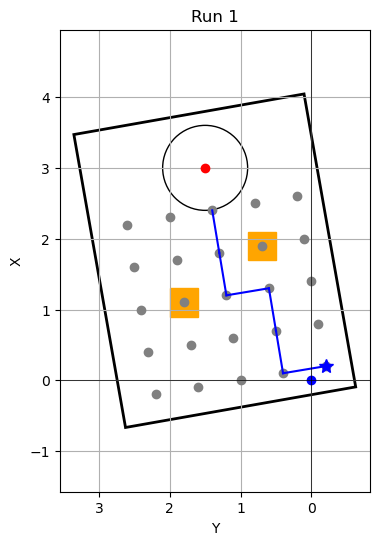

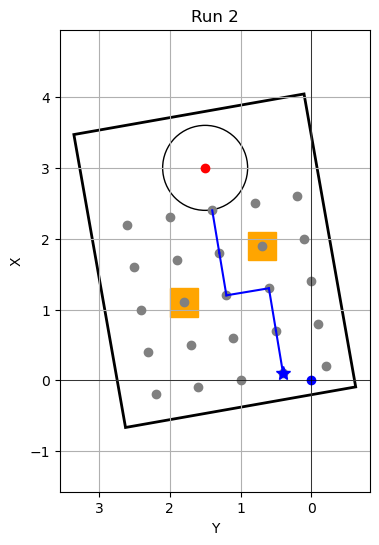

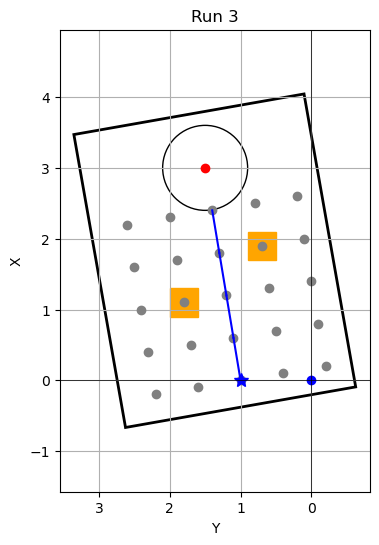

In [79]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms
from matplotlib.lines import Line2D

def robotTrajectory(time, x, y, name):
    plt.figure(figsize=(4, 6))
    plt.xlim(-2, 4)
    plt.ylim(-5, 5)

    plt.plot(1.6, -0.1, 'o', color='gray')
    plt.plot(2.2, -0.2, 'o', color='gray')
    plt.plot(1, 0, 'o', color='gray')
    plt.plot(0.4, 0.1, 'o', color='gray')
    plt.plot(-0.2, 0.2, 'o', color='gray')
    plt.plot(2.3, 0.4, 'o', color='gray')
    plt.plot(1.7, 0.5, 'o', color='gray')
    plt.plot(1.1, 0.6, 'o', color='gray')
    plt.plot(0.5, 0.7, 'o', color='gray')
    plt.plot(-0.1, 0.8, 'o', color='gray')
    plt.plot(2.4, 1, 'o', color='gray')
    plt.plot(1.8, 1.1, 'o', color='gray')
    plt.plot(1.2, 1.2, 'o', color='gray')
    plt.plot(0.6, 1.3, 'o', color='gray')
    plt.plot(0, 1.4, 'o', color='gray')
    plt.plot(2.5, 1.6, 'o', color='gray')
    plt.plot(1.9, 1.7, 'o', color='gray')
    plt.plot(1.3, 1.8, 'o', color='gray')
    plt.plot(0.7, 1.9, 'o', color='gray')
    plt.plot(0.1, 2, 'o', color='gray')
    plt.plot(2.6, 2.2, 'o', color='gray')
    plt.plot(2, 2.3, 'o', color='gray')
    plt.plot(1.4, 2.4, 'o', color='gray')
    plt.plot(0.8, 2.5, 'o', color='gray')
    plt.plot(0.2, 2.6, 'o', color='gray')

    for i in range(len(x) - 1):
        plt.plot([x[i], x[i + 1]], [y[i], y[i + 1]], color='b', linestyle='-')


    plt.title(name)
    plt.xlabel('Y')
    plt.ylabel('X')
    plt.grid(True)

    plt.plot(x[0], y[0], marker='*', markersize=10, color='blue')
    plt.plot(0, 0, 'bo')
    plt.plot(1.5, 3.0, 'ro')
    circle = plt.Circle((1.5, 3.0), .6, color='black', fill=False)
    plt.gca().add_patch(circle)


    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    legend_lines = [
        Line2D([0], [0], color='blue', linewidth=2, linestyle='-'),
        Line2D([0], [0], color='red', linewidth=2, linestyle='-'),
        Line2D([0], [0], color='green', linewidth=2, linestyle='-'),
        Line2D([0], [0], color='orange', linewidth=2, linestyle='-')
    ]

    # Define behavior labels for the legend
    behavior_labels = ['GPT-4', 'GPT-3.5', 'BERT', 'Gemini']

    # plt.legend(legend_lines, behavior_labels, loc='upper right', fontsize='small')

    square1 = patches.Rectangle((1.6, .9), 0.4, 0.4, linewidth=1, edgecolor='orange', facecolor='orange')
    plt.gca().add_patch(square1)

    square2 = patches.Rectangle((0.5, 1.7), 0.4, 0.4, linewidth=1, edgecolor='orange', facecolor='orange')
    plt.gca().add_patch(square2)

    rectangle = patches.Rectangle((-.6, -.2), 3.3, 4.2, linewidth=2, edgecolor='black', facecolor='none')
    center_rect = (-4.1 + 4.1, -1.65 + 1.65)
    rotation_rect = transforms.Affine2D().rotate_deg(-10).translate(*center_rect)
    rectangle.set_transform(rotation_rect + plt.gca().transData)
    plt.gca().add_patch(rectangle)

    plt.gca().invert_xaxis()
    plt.axis('equal')

    plt.show()

def graph(data, name):
    time = data.time
    x = data.y
    y = data.x
    name = name
    return robotTrajectory(time, x, y, name)

graph(run1, 'Run 1')
graph(run2, 'Run 2')
graph(run3, 'Run 3')

## LLM Continuous

In [2]:
import pandas as pd
import os
import glob

import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms
from matplotlib.lines import Line2D

from scipy.stats import ttest_ind


In [4]:

path = '/home/sunzid/Research/23-24_Automatic-Control-Lab/Projects/24_LLM/TrajectoryData'

# path = '23-24_Automatic-Control-Lab/LLMSim/MS_Thesis_Experiment'

os.chdir(path)

!ls

Fusion_a1_1-1.csv  LLM_a1_0-2.csv    LLM_a2_4-4.csv  trajectory_animation.gif
Fusion_a1_1-2.csv  LLM_a1_0_ego.csv  OO_a1_1-1.csv   VO_a1_1-1.csv
Fusion_a1_1-3.csv  LLM_a1_1-1.csv    OO_a1_1-2.csv   VO_a1_1-2.csv
Fusion_a1_1-4.csv  LLM_a1_1-2.csv    OO_a1_1-3.csv   VO_a1_1-3.csv
Fusion_a1_2-1.csv  LLM_a1_1-3.csv    OO_a1_1-4.csv   VO_a1_1-4.csv
Fusion_a1_2-2.csv  LLM_a1_1-4.csv    OO_a1_2-1.csv   VO_a1_2-1.csv
Fusion_a1_2-3.csv  LLM_a1_2-1.csv    OO_a1_2-2.csv   VO_a1_2-2.csv
Fusion_a1_2-4.csv  LLM_a1_2-2.csv    OO_a1_2-3.csv   VO_a1_2-3.csv
Fusion_a1_3-1.csv  LLM_a1_2-3.csv    OO_a1_2-4.csv   VO_a1_2-4.csv
Fusion_a1_3-2.csv  LLM_a1_2-4.csv    OO_a1_3-1.csv   VO_a1_3-1.csv
Fusion_a1_3-3.csv  LLM_a1_3-1.csv    OO_a1_3-2.csv   VO_a1_3-2.csv
Fusion_a1_3-4.csv  LLM_a1_3-2.csv    OO_a1_3-3.csv   VO_a1_3-3.csv
Fusion_a1_4-1.csv  LLM_a1_3-3.csv    OO_a1_3-4.csv   VO_a1_3-4.csv
Fusion_a1_4-2.csv  LLM_a1_3-4.csv    OO_a1_4-1.csv   VO_a1_4-1.csv
Fusion_a1_4-3.csv  LLM_a1_4-1.csv    OO_a1_4-2.csv 

### Trajectory Function

In [1]:
def selectDataFiles(path):
    return glob.glob(path+"*.csv"), path

def combinedTrajectories(path):
    colY = 1
    colX = 2

    sourceY = 3.2
    sourceX = 1.4
    sourceDeclarationRad = 0.8

    mapAngle = -10

    behavior_color = {
        'In': 'blue',
        'Out': 'red',
        'Vision': 'green',
        'Vision_front': 'green',
        'Vision_left': 'green',
        'Vision_right': 'green',
        'ObstacleAvoidance': 'orange',
    }

    files, path = selectDataFiles(path)

    plt.figure(figsize=(4,6))
    plt.xlim(-2, 4)
    plt.ylim(-5, 5)

    for file in files:
        trajectoryData = pd.read_csv(file)

        for i in range(len(trajectoryData.iloc[:, 3])-1):
            plt.plot([trajectoryData.iloc[i,colX], trajectoryData.iloc[i+1,colX]],
                      [trajectoryData.iloc[i,colY], trajectoryData.iloc[i+1,colY]], 
                      color=behavior_color[trajectoryData.iloc[i,3]])
        
        plt.plot(trajectoryData.iloc[0, colX], trajectoryData.iloc[0, colY], marker='*', markersize=10, color='blue')

    plt.plot(0, 0, 'bo')
    plt.plot(sourceX, sourceY, 'ro')
    circle = plt.Circle((sourceX, sourceY), sourceDeclarationRad, color='black', fill=False)
    plt.gca().add_patch(circle)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    if path.split('_')[0] == 'OO':
        legend_lines = [
        Line2D([0], [0], color=behavior_color['In'], linewidth=2, linestyle='-'),
        Line2D([0], [0], color=behavior_color['Out'], linewidth=2, linestyle='-'),
        Line2D([0], [0], color=behavior_color['ObstacleAvoidance'], linewidth=2, linestyle='-')]
        behavior_labels = ['Upwind', 'Crosswind', 'Obs. Avoid']

    elif path.split('_')[0] == 'VO':
        legend_lines = [
        Line2D([0], [0], color=behavior_color['Out'], linewidth=2, linestyle='-'),
        Line2D([0], [0], color=behavior_color['Vision'], linewidth=2, linestyle='-'),
        Line2D([0], [0], color=behavior_color['ObstacleAvoidance'], linewidth=2, linestyle='-')]
        behavior_labels = ['Crosswind', 'Vision', 'Obs. Avoid']

    else:
        legend_lines = [
        Line2D([0], [0], color=behavior_color['In'], linewidth=2, linestyle='-'),
        Line2D([0], [0], color=behavior_color['Out'], linewidth=2, linestyle='-'),
        Line2D([0], [0], color=behavior_color['Vision'], linewidth=2, linestyle='-'),
        Line2D([0], [0], color=behavior_color['ObstacleAvoidance'], linewidth=2, linestyle='-')]
        behavior_labels = ['Upwind', 'Crosswind', 'Vision', 'Obs. Avoid']


    # Define behavior labels for the legend
    # behavior_labels = ['Upwind', 'Crosswind', 'Vision', 'Obs. Avoid']

    plt.legend(legend_lines, behavior_labels, loc='upper right', fontsize='small')

    # plt.title(path)
    plt.xlabel('Y')
    plt.ylabel('X')
    plt.grid(True)


    obstacle = patches.Rectangle((0.3, -0.9), 0.6, 0.3, linewidth=1, edgecolor='orange', angle=mapAngle, facecolor='orange')
    plt.gca().add_patch(obstacle)

    mapBoundary = patches.Rectangle((-1.2, -4.1), 3.3, 8.2, linewidth=2, edgecolor='black', angle=mapAngle, facecolor='none')
    plt.gca().add_patch(mapBoundary)
    plt.gca().invert_xaxis()
    plt.axis('equal')

    plt.show()


### Trajectory Graphs

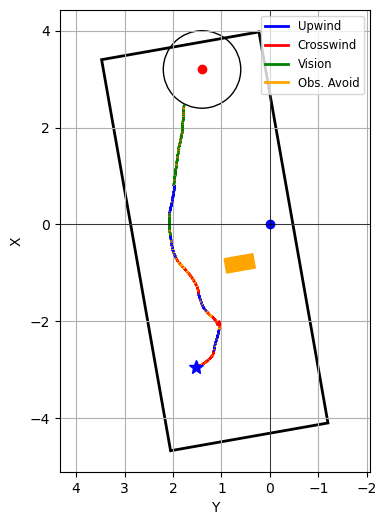

In [5]:
combinedTrajectories("LLM_a1_0-2")

In [ ]:
combinedTrajectories("LLM_a1_1-1")
combinedTrajectories("LLM_a1_1-2")
combinedTrajectories("LLM_a1_1-3")
combinedTrajectories("LLM_a1_1-4")

In [ ]:
combinedTrajectories("LLM_a2_1-1")
combinedTrajectories("LLM_a2_1-2")
combinedTrajectories("LLM_a2_1-3")
combinedTrajectories("LLM_a2_1-4")

In [ ]:
combinedTrajectories("OO_a1_1")
combinedTrajectories("OO_a1_2")
combinedTrajectories("OO_a1_4")
combinedTrajectories("OO_a1_3")

In [ ]:
combinedTrajectories("OO_a2_1")
combinedTrajectories("OO_a2_2")
combinedTrajectories("OO_a2_3")
combinedTrajectories("OO_a2_4")

In [ ]:
combinedTrajectories("VO_a1_1")
combinedTrajectories("VO_a1_2")
combinedTrajectories("VO_a1_3")
combinedTrajectories("VO_a1_4")

In [ ]:
combinedTrajectories("VO_a2_1")
combinedTrajectories("VO_a2_2")
combinedTrajectories("VO_a2_3")
combinedTrajectories("VO_a2_4")

In [ ]:
combinedTrajectories("Fusion_a1_1")
combinedTrajectories("Fusion_a1_2")
combinedTrajectories("Fusion_a1_4")
combinedTrajectories("Fusion_a1_3")

In [ ]:
combinedTrajectories("Fusion_a2_1")
combinedTrajectories("Fusion_a2_2")
combinedTrajectories("Fusion_a2_3")
combinedTrajectories("Fusion_a2_4")

In [ ]:
combinedTrajectories("LLM_a1_1")
combinedTrajectories("LLM_a1_2")
combinedTrajectories("LLM_a1_3")
combinedTrajectories("LLM_a1_4")

In [ ]:
combinedTrajectories("LLM_a2_1")
combinedTrajectories("LLM_a2_2")
combinedTrajectories("LLM_a2_3")
combinedTrajectories("LLM_a2_4")

### Trajectory Animation

In [1]:
import pandas as pd
import os
import glob

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib.animation as animation
import matplotlib.collections as mcollections

In [2]:
path = '/home/sunzid/Research/23-24_Automatic-Control-Lab/Projects/24_LLM/TrajectoryData'

# path = '23-24_Automatic-Control-Lab/LLMSim/MS_Thesis_Experiment'

os.chdir(path)

!ls

Fusion_a1_1-1.csv  LLM_a1_0-2.csv    LLM_a2_4-3.csv  OO_a2_4-4.csv
Fusion_a1_1-2.csv  LLM_a1_0_ego.csv  LLM_a2_4-4.csv  VO_a1_1-1.csv
Fusion_a1_1-3.csv  LLM_a1_1-1.csv    OO_a1_1-1.csv   VO_a1_1-2.csv
Fusion_a1_1-4.csv  LLM_a1_1-2.csv    OO_a1_1-2.csv   VO_a1_1-3.csv
Fusion_a1_2-1.csv  LLM_a1_1-3.csv    OO_a1_1-3.csv   VO_a1_1-4.csv
Fusion_a1_2-2.csv  LLM_a1_1-4.csv    OO_a1_1-4.csv   VO_a1_2-1.csv
Fusion_a1_2-3.csv  LLM_a1_1_ego.csv  OO_a1_2-1.csv   VO_a1_2-2.csv
Fusion_a1_2-4.csv  LLM_a1_2-1.csv    OO_a1_2-2.csv   VO_a1_2-3.csv
Fusion_a1_3-1.csv  LLM_a1_2-2.csv    OO_a1_2-3.csv   VO_a1_2-4.csv
Fusion_a1_3-2.csv  LLM_a1_2-3.csv    OO_a1_2-4.csv   VO_a1_3-1.csv
Fusion_a1_3-3.csv  LLM_a1_2-4.csv    OO_a1_3-1.csv   VO_a1_3-2.csv
Fusion_a1_3-4.csv  LLM_a1_3-1.csv    OO_a1_3-2.csv   VO_a1_3-3.csv
Fusion_a1_4-1.csv  LLM_a1_3-2.csv    OO_a1_3-3.csv   VO_a1_3-4.csv
Fusion_a1_4-2.csv  LLM_a1_3-3.csv    OO_a1_3-4.csv   VO_a1_4-1.csv
Fusion_a1_4-3.csv  LLM_a1_3-4.csv    OO_a1_4-1.csv   VO_a1_4-2

In [3]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import patches
import matplotlib.animation as animation
import matplotlib.collections as mcollections
import numpy as np

def selectDataFiles(path):
    return glob.glob(path + "*.csv"), path

def animatedTrajectories(path):
    colY = 1
    colX = 2
    colBehavior = 3

    sourceY = 3.2
    sourceX = 1.4
    sourceDeclarationRad = 0.8

    mapAngle = -10

    behavior_color = {
        'In': 'blue',
        'Out': 'red',
        'Vision': 'green',
        'Vision_front': 'green',
        'Vision_left': 'green',
        'Vision_right': 'green',
        'ObstacleAvoidance': 'orange',
    }

    files, path = selectDataFiles(path)

    fig, ax = plt.subplots(figsize=(4, 6))
    ax.set_xlim(-2, 4)
    ax.set_ylim(-5, 5)

    trajectories = []
    for file in files:
        trajectoryData = pd.read_csv(file)
        trajectories.append(trajectoryData)

    ax.plot(0, 0, 'bo')
    ax.plot(sourceX, sourceY, 'ro')
    circle = plt.Circle((sourceX, sourceY), sourceDeclarationRad, color='black', fill=False)
    ax.add_patch(circle)

    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

    obstacle = patches.Rectangle((0.3, -0.9), 0.6, 0.3, linewidth=1, edgecolor='orange', angle=mapAngle, facecolor='orange')
    ax.add_patch(obstacle)

    mapBoundary = patches.Rectangle((-1.2, -4.1), 3.3, 8.2, linewidth=2, edgecolor='black', angle=mapAngle, facecolor='none')
    ax.add_patch(mapBoundary)

    ax.invert_xaxis()
    ax.set_aspect('equal')

    ax.set_xlabel('Y')
    ax.set_ylabel('X')
    ax.grid(True)

    line_segments = [ax.add_collection(mcollections.LineCollection([], linewidths=2)) for _ in trajectories]

    def init():
        for line_segment in line_segments:
            line_segment.set_segments([])
        return line_segments

    def animate(frame):
        for traj, line_segment in zip(trajectories, line_segments):
            if frame < len(traj):
                x_data = traj.iloc[:frame+1, colX].tolist()
                y_data = traj.iloc[:frame+1, colY].tolist()
                colors = [behavior_color[behavior] for behavior in traj.iloc[:frame+1, colBehavior]]
                
                segments = [((x_data[i], y_data[i]), (x_data[i+1], y_data[i+1])) for i in range(len(x_data)-1)]
                line_segment.set_segments(segments)
                line_segment.set_color(colors[:-1])  # Use colors up to the second-to-last point
        
        return line_segments

    # Set parameters for animation duration
    total_runtime = 80.9333  # seconds
    fps = 30  # frames per second
    num_frames = int(total_runtime * fps)

    # Create a mapping between original data points and animation frames
    original_frames = 2428
    frame_map = np.linspace(0, original_frames - 1, num_frames).astype(int)

    def animate_mapped(frame):
        mapped_frame = frame_map[frame]
        return animate(mapped_frame)

    anim = animation.FuncAnimation(fig, animate_mapped, init_func=init,
                                   frames=num_frames,
                                   interval=1000/fps, blit=True)

    if path.split('_')[0] == 'OO':
        legend_lines = [
            Line2D([0], [0], color=behavior_color['In'], linewidth=2, linestyle='-'),
            Line2D([0], [0], color=behavior_color['Out'], linewidth=2, linestyle='-'),
            Line2D([0], [0], color=behavior_color['ObstacleAvoidance'], linewidth=2, linestyle='-')
        ]
        behavior_labels = ['Upwind', 'Crosswind', 'Obs. Avoid']
    elif path.split('_')[0] == 'VO':
        legend_lines = [
            Line2D([0], [0], color=behavior_color['Out'], linewidth=2, linestyle='-'),
            Line2D([0], [0], color=behavior_color['Vision'], linewidth=2, linestyle='-'),
            Line2D([0], [0], color=behavior_color['ObstacleAvoidance'], linewidth=2, linestyle='-')
        ]
        behavior_labels = ['Crosswind', 'Vision', 'Obs. Avoid']
    else:
        legend_lines = [
            Line2D([0], [0], color=behavior_color['In'], linewidth=2, linestyle='-'),
            Line2D([0], [0], color=behavior_color['Out'], linewidth=2, linestyle='-'),
            Line2D([0], [0], color=behavior_color['Vision'], linewidth=2, linestyle='-'),
            Line2D([0], [0], color=behavior_color['ObstacleAvoidance'], linewidth=2, linestyle='-')
        ]
        behavior_labels = ['Upwind', 'Crosswind', 'Vision', 'Obs. Avoid']

    ax.legend(legend_lines, behavior_labels, loc='upper right', fontsize='small')

    # Save the animation
    anim.save('trajectory_animation.gif', writer='pillow', fps=fps)

    plt.show()

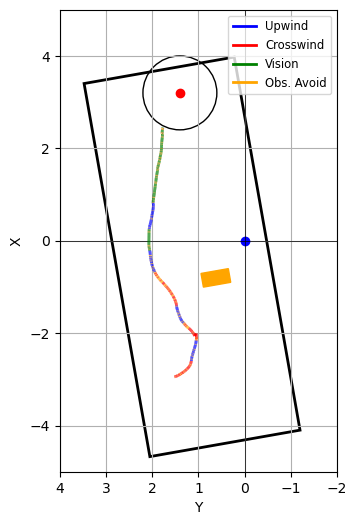

In [4]:
animatedTrajectories('LLM_a1_0-2')

### Statistics

In [3]:
algorithm_list = []
airflowEnv_list = []
startPoint_list = []
trial_list = []
time_list = []
x_list = []
y_list = []
dist_list = []

files = glob.glob('*.csv')
for file in files:
    df = pd.read_csv(file)

    data = pd.read_csv(file)
    leng = len(data.iloc[:,0])

    for i in range(leng):
        algorithm_list.append(file.split('_')[0])
        airflowEnv_list.append(file.split('_')[1][1])
        startPoint_list.append(file.split('_')[2][0])
        trial_list.append(file.split('_')[2][2])
        time_list.append(data.iloc[i, 0])
        x_list.append(data.iloc[i, 1])
        y_list.append(data.iloc[i, 2])
        if i < leng-1:
            # distance calculation
            dist_list.append(math.sqrt((data.iloc[i+1, 1] - data.iloc[i, 1])**2+(data.iloc[i+1, 2] - data.iloc[i, 2])**2))
        elif i == leng-1:
            dist_list.append(0)


df = pd.DataFrame({'Algorithm': algorithm_list,
                  'Airflow_env': airflowEnv_list,
                  'Time_list': time_list,
                  'StartPoint': startPoint_list,
                  'Trial': trial_list,
                  'X': x_list,
                  'Y': y_list,
                  'Distance': dist_list})
# df.groupby('Algorithm', 'Airflow_env', 'StartPpoint')
Trials = df.groupby(['Algorithm', 'Airflow_env', 'StartPoint','Trial']).agg({
                    'Time_list': 'max', 'Distance': 'sum'}).reset_index()
Trials['Success'] = (Trials['Time_list'] < 120).astype(int)

StartPoints = Trials[Trials['Success']==1].groupby(['Algorithm', 'Airflow_env', 'StartPoint']).agg({
                    'Time_list': ['mean', 'std'], 'Distance': ['mean', 'std'], 'Success': 'sum'}).reset_index()

StartPoints.columns = ['_'.join(col).strip('_') for col in StartPoints.columns.values]

Algorithms = StartPoints.groupby(['Algorithm', 'Airflow_env']).agg({
                    'Time_list_mean': 'mean', 'Time_list_std': 'mean', 'Distance_mean': 'mean', 'Distance_std': 'mean', 'Success_sum': 'sum'}).reset_index()

Algorithms[['Time_list_mean','Time_list_std','Distance_mean','Distance_std']] = Algorithms[['Time_list_mean','Time_list_std','Distance_mean','Distance_std']].round(2)


In [ ]:
t_stat_time, p_value_time = ttest_ind(Algorithms[Algorithms['Algorithm']=='Fusion']['Time_list_mean'],
                                       Algorithms[Algorithms['Algorithm']=='LLM']['Time_list_mean'])

t_stat_dist, p_value_dist = ttest_ind(Algorithms[Algorithms['Algorithm']=='Fusion']['Distance_mean'],
                                       StartPoints[StartPoints['Algorithm']=='LLM']['Distance_mean'])


In [4]:
Algorithms#.to_csv('algorithmSummary.csv')

,Algorithm,Airflow_env,Time_list_mean,Time_list_std,Distance_mean,Distance_std,Success_sum
0,Fusion,1,84.20,12.42,6.12,0.52,12
1,Fusion,2,97.79,4.69,7.08,0.53,8
2,LLM,1,80.33,4.99,6.14,0.34,16
3,LLM,2,85.30,5.03,6.37,0.31,12
4,OO,1,98.46,11.87,6.86,0.35,10
5,VO,1,95.23,3.91,6.68,0.27,8
6,VO,2,90.67,NaN,6.69,NaN,2


In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 1: Perform ANOVA
anova_result = stats.f_oneway(
    Trials[Trials['Algorithm'] == 'LLM']['Success'],
    Trials[Trials['Algorithm'] == 'Fusion']['Success'],
    Trials[Trials['Algorithm'] == 'OO']['Success'],
    Trials[Trials['Algorithm'] == 'VO']['Success']
)

# Step 2: If ANOVA is significant, perform pairwise comparisons (Tukey HSD)
tukey = pairwise_tukeyhsd(endog=Trials['Success'], groups=Trials['Algorithm'], alpha=0.05)

summary_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

# Step 4: Reorder rows so that LLM starts in group1
# We sort by group1 and group2 to ensure 'LLM' is prioritized in the comparisons
summary_df_sorted = summary_df.sort_values(by=['group1', 'group2'], key=lambda x: x.replace('LLM', '0'))

# Display the reordered results
print(summary_df_sorted)

   group1 group2  meandiff   p-adj   lower   upper  reject
3     LLM     OO   -0.5625  0.0000 -0.8534 -0.2716    True
4     LLM     VO   -0.5625  0.0000 -0.8534 -0.2716    True
0  Fusion    LLM    0.2500  0.1187 -0.0409  0.5409   False
1  Fusion     OO   -0.3125  0.0300 -0.6034 -0.0216    True
2  Fusion     VO   -0.3125  0.0300 -0.6034 -0.0216    True
5      OO     VO    0.0000  1.0000 -0.2909  0.2909   False


In [20]:
summary_df = summary_df_sorted

In [21]:
summary_df_sorted

,group1,group2,meandiff,p-adj,lower,upper,reject
3,LLM,OO,-0.5625,0.0000,-0.8534,-0.2716,True
4,LLM,VO,-0.5625,0.0000,-0.8534,-0.2716,True
0,Fusion,LLM,0.2500,0.1187,-0.0409,0.5409,False
1,Fusion,OO,-0.3125,0.0300,-0.6034,-0.0216,True
2,Fusion,VO,-0.3125,0.0300,-0.6034,-0.0216,True
5,OO,VO,0.0000,1.0000,-0.2909,0.2909,False


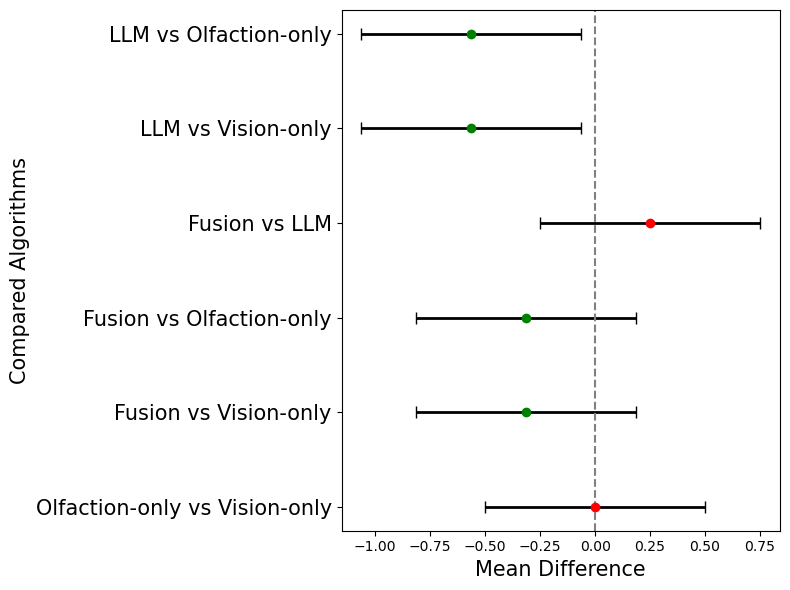

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
groups = ['LLM vs Olfaction-only', 'LLM vs Vision-only', 'Fusion vs LLM', 
          'Fusion vs Olfaction-only', 'Fusion vs Vision-only', 'Olfaction-only vs Vision-only']
mean_diff = [summary_df.iloc[0,2], summary_df.iloc[1,2], summary_df.iloc[2,2], summary_df.iloc[3,2], summary_df.iloc[4,2], summary_df.iloc[5,2]]
p_values = [summary_df.iloc[0,3], summary_df.iloc[1,3], summary_df.iloc[2,3], summary_df.iloc[3,3], summary_df.iloc[4,3], summary_df.iloc[5,3]]
reject_h0 = [summary_df.iloc[0,6], summary_df.iloc[1,6], summary_df.iloc[2,6], summary_df.iloc[3,6], summary_df.iloc[4,6], summary_df.iloc[5,6]]

# Define colors for rejected and non-rejected hypotheses
colors = ['red' if not r else 'green' for r in reject_h0]

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each mean difference with corresponding color
y_pos = np.arange(len(groups))
for i in range(len(groups)):
    ax.errorbar(mean_diff[i], y_pos[i], xerr=0.5, fmt='o', color=colors[i], ecolor='black', elinewidth=2, capsize=4)

# Add the group names to the y-axis
ax.set_yticks(y_pos)
ax.set_yticklabels(groups, fontsize=15)

# Label the axes
ax.set_xlabel('Mean Difference', fontsize=15)
ax.set_ylabel('Compared Algorithms', fontsize=15)
# ax.set_title('Forest Plot of Mean Differences')

# Add a vertical line at 0 for reference
ax.axvline(x=0, color='gray', linestyle='--')


# Show the plot
plt.gca().invert_yaxis()  # Invert y-axis to match the table's order
plt.tight_layout()
plt.show()


## 24-Jul-22 DiLU Results

In [1]:
import pandas as pd
import os
import glob

import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms
from matplotlib.lines import Line2D

from scipy.stats import ttest_ind

!ls

3d_table.csv  MS_Thesis_Experiment   turtlebot_LLM_nav3.py
grid.csv      olfaction_data.csv
LLMSim.ipynb  turtlebot_LLM_nav1.py


In [13]:
path = '/home/sunzid/LLMSim/DILU_RUN_Jul22'
os.chdir(path)

In [14]:
def selectDataFiles(path):
    return glob.glob(path+"*.csv"), path


In [9]:
def combinedTrajectories(path):
    colY = 1
    colX = 2

    sourceY = 3.0
    sourceX = 1.5
    sourceDeclarationRad = 0.6

    mapAngle = -10

    behavior_color = {
        'In': 'blue',
        'Out': 'red',
        'Vision': 'green',
        'Vision_front': 'green',
        'Vision_left': 'green',
        'Vision_right': 'green',
        'ObstacleAvoidance': 'orange',
    }

    files, path = selectDataFiles(path)

    plt.figure(figsize=(4,6))
    plt.xlim(-2, 4)
    plt.ylim(-5, 5)

    for file in files:
        trajectoryData = pd.read_csv(file)

        for i in range(len(trajectoryData.iloc[:, 3])-1):
            plt.plot([trajectoryData.iloc[i,colX], trajectoryData.iloc[i+1,colX]],
                      [trajectoryData.iloc[i,colY], trajectoryData.iloc[i+1,colY]], 
                      color=behavior_color[trajectoryData.iloc[i,3]])
        
        plt.plot(trajectoryData.iloc[0, colX], trajectoryData.iloc[0, colY], marker='*', markersize=10, color='blue')

    plt.plot(0, 0, 'bo')
    plt.plot(sourceX, sourceY, 'ro')
    circle = plt.Circle((sourceX, sourceY), sourceDeclarationRad, color='black', fill=False)
    plt.gca().add_patch(circle)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    legend_lines = [
    Line2D([0], [0], color=behavior_color['In'], linewidth=2, linestyle='-'),
    Line2D([0], [0], color=behavior_color['Out'], linewidth=2, linestyle='-'),
    ]

    # Define behavior labels for the legend
    behavior_labels = ['Upwind', 'Crosswind']

    plt.legend(legend_lines, behavior_labels, loc='upper right', fontsize='small')

    plt.title(path)
    plt.xlabel('Y')
    plt.ylabel('X')
    plt.grid(True)

    mapBoundary = patches.Rectangle((-1.2, -4.1), 3.3, 8.2, linewidth=2, edgecolor='black', angle=mapAngle, facecolor='none')
    plt.gca().add_patch(mapBoundary)
    plt.gca().invert_xaxis()
    plt.axis('equal')

    plt.show()


In [ ]:
combinedTrajectories("aH_0")
combinedTrajectories("aH_3")
combinedTrajectories("aH_5")

combinedTrajectories("H_3")

combinedTrajectories("nH_0")
combinedTrajectories("nH_3")

In [ ]:
combinedTrajectories("aH_0_1")
combinedTrajectories("aH_0_2")
combinedTrajectories("aH_0_3")
combinedTrajectories("aH_0_4")
combinedTrajectories("aH_0_5")

combinedTrajectories("aH_3_1")
combinedTrajectories("aH_3_2")
combinedTrajectories("aH_3_3")
combinedTrajectories("aH_3_4")
combinedTrajectories("aH_3_5")

combinedTrajectories("aH_5_1")
combinedTrajectories("aH_5_2")
combinedTrajectories("aH_5_3")
combinedTrajectories("aH_5_4")
combinedTrajectories("aH_5_5")

combinedTrajectories("H_3_1")
combinedTrajectories("H_3_2")
combinedTrajectories("H_3_3")
combinedTrajectories("H_3_4")
combinedTrajectories("H_3_5")

combinedTrajectories("nH_0_1")
combinedTrajectories("nH_0_2")
combinedTrajectories("nH_0_3")
combinedTrajectories("nH_0_4")
combinedTrajectories("nH_0_5")

combinedTrajectories("nH_3_1")
combinedTrajectories("nH_3_2")
combinedTrajectories("nH_3_3")
combinedTrajectories("nH_3_4")
combinedTrajectories("nH_3_5")



### RL

In [18]:
def combinedTrajectories(path):
    colY = 1
    colX = 2

    sourceY = 3.0
    sourceX = 1.5
    sourceDeclarationRad = 0.6

    mapAngle = -10

    files, path = selectDataFiles(path)

    plt.figure(figsize=(4,6))
    plt.xlim(-2, 4)
    plt.ylim(-5, 5)

    for file in files:
        trajectoryData = pd.read_csv(file)

        for i in range(len(trajectoryData.iloc[:, 3])-1):
            plt.plot([trajectoryData.iloc[i,colX], trajectoryData.iloc[i+1,colX]],
                      [trajectoryData.iloc[i,colY], trajectoryData.iloc[i+1,colY]], color='blue')
        
        plt.plot(trajectoryData.iloc[0, colX], trajectoryData.iloc[0, colY], marker='*', markersize=10, color='blue')

    plt.plot(0, 0, 'bo')
    plt.plot(sourceX, sourceY, 'ro')
    circle = plt.Circle((sourceX, sourceY), sourceDeclarationRad, color='black', fill=False)
    plt.gca().add_patch(circle)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    plt.title(path)
    plt.xlabel('Y')
    plt.ylabel('X')
    plt.grid(True)

    mapBoundary = patches.Rectangle((-1.2, -4.1), 3.3, 8.2, linewidth=2, edgecolor='black', angle=mapAngle, facecolor='none')
    plt.gca().add_patch(mapBoundary)
    plt.gca().invert_xaxis()
    plt.axis('equal')

    plt.show()


In [ ]:
combinedTrajectories("RL")
combinedTrajectories("RL_1")
combinedTrajectories("RL_2")
combinedTrajectories("RL_3")
combinedTrajectories("RL_4")
combinedTrajectories("RL_5")